**Exercícios de Aprendizado Supervisionado**

In [ ]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [49]:
#Digite seu código aqui
file_path = 'Crop_recommendation.csv'
df = pd.read_csv(file_path)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [50]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [51]:
print("Null values")
df[pd.isnull(df).any(axis=1)]

Null values


,N,P,K,temperature,humidity,ph,rainfall,label


In [52]:
print("amount per class")
df['label'].value_counts()

amount per class


label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: count, dtype: int64

In [53]:
X = df.drop('label', axis=1).values
y = df['label'].values

X, y

(array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
           6.50298529, 202.9355362 ],
        [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
           7.03809636, 226.6555374 ],
        [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
           7.84020714, 263.9642476 ],
        ...,
        [110.        ,  78.        ,  50.        , ...,  78.89864446,
           5.91556897,  98.21747528],
        [ 94.        ,  70.        ,  48.        , ...,  84.88394407,
           6.19515244,  91.46442491],
        [ 80.        ,  71.        ,  47.        , ...,  80.79783998,
           6.1563735 , 105.0776992 ]]),
 array(['rice', 'rice', 'rice', ..., 'banana', 'banana', 'banana'],
       dtype=object))

**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [54]:
#Digite seu código aqui

#Normalize labels in numbers
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
y_normalized = np.array([label_map[val] for val in y], dtype=int)
label_map

{'Soyabeans': 0,
 'apple': 1,
 'banana': 2,
 'beans': 3,
 'coffee': 4,
 'cotton': 5,
 'cowpeas': 6,
 'grapes': 7,
 'groundnuts': 8,
 'maize': 9,
 'mango': 10,
 'orange': 11,
 'peas': 12,
 'rice': 13,
 'watermelon': 14}

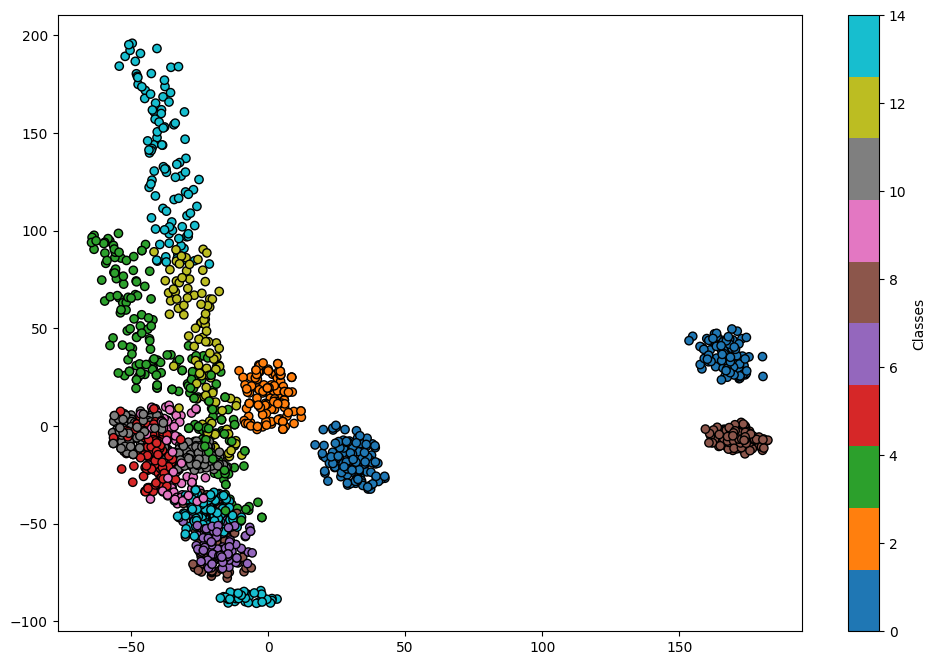

In [55]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_normalized, cmap='tab10', edgecolors='k')

# Criando a legenda
plt.colorbar(scatter, label="Classes")
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_normalized, test_size=0.3, random_state=42
)


**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

**Utilizando Decision Tree**

In [91]:
#Digite seu código aqui

clf_d_tree = tree.DecisionTreeClassifier()
clf_d_tree = clf_d_tree.fit(X_train, y_train)
y_pred_d_tree = clf_d_tree.predict(X_test)

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

In [92]:
print(" Manual acc calculation  ")
correct_prediction = 0
n=0
for real, predict in zip(y_test,y_pred_d_tree):
    if real == predict:
        correct_prediction +=1
    n+=1
    
acc_decision_tree = correct_prediction/n
print(f" Accuracy Decision Tree: {acc_decision_tree}")

 Manual acc calculation  
 Accuracy Decision Tree: 1.0


In [93]:
acc_score = accuracy_score(y_test, y_pred_d_tree)
print(f"acc score from scikit-learn: {acc_score}")


acc score from scikit-learn: 1.0


In [94]:
print("Decision Tree precision")

precision = precision_score(y_test, y_pred_d_tree, average="macro")
print("macro precision",precision)
precision = precision_score(y_test, y_pred_d_tree, average="micro")
print("micro precision",precision)
precision = precision_score(y_test, y_pred_d_tree, average="weighted")
print("weighted precision",precision)

Decision Tree precision
macro precision 1.0
micro precision 1.0
weighted precision 1.0


Labels


{'Soyabeans': 0,
 'apple': 1,
 'banana': 2,
 'beans': 3,
 'coffee': 4,
 'cotton': 5,
 'cowpeas': 6,
 'grapes': 7,
 'groundnuts': 8,
 'maize': 9,
 'mango': 10,
 'orange': 11,
 'peas': 12,
 'rice': 13,
 'watermelon': 14}

<Figure size 1200x800 with 0 Axes>

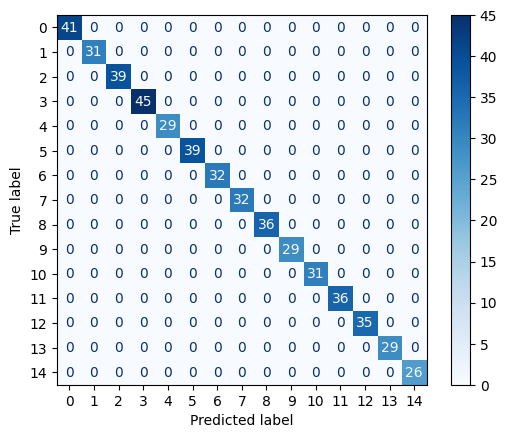

In [95]:
print("Labels")
display(label_map)

conf_matriz = confusion_matrix(y_test, y_pred_d_tree)
plt.figure(figsize=(12,8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matriz)
disp.plot(cmap=plt.cm.Blues)
plt.show()

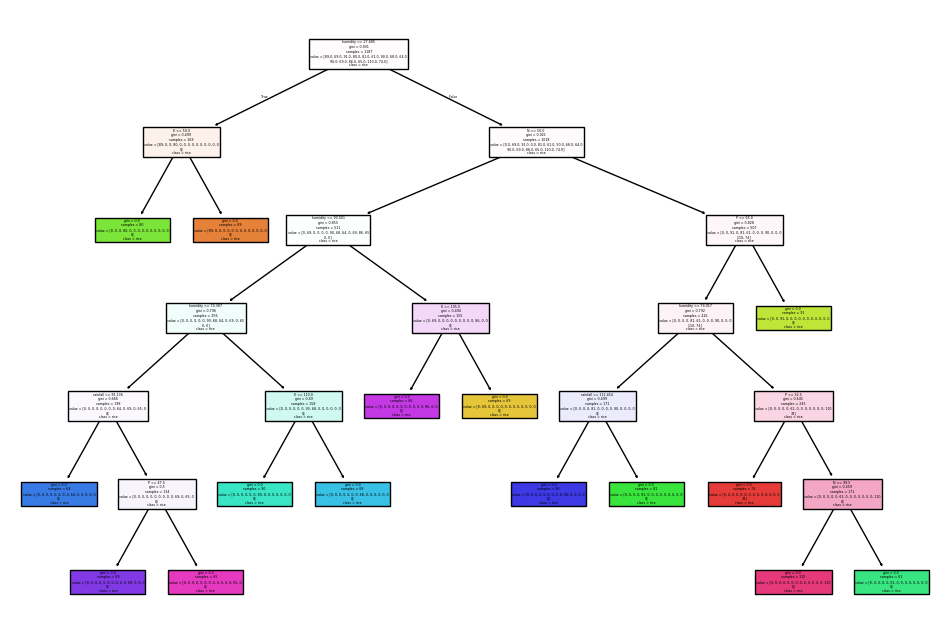

In [ ]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf_d_tree, feature_names=df.columns, class_names=y, filled=True)
plt.show()

In [ ]:
# Visualizar a árvore de decisão em forma de texto
tree_representation = tree.export_text(clf_d_tree)
print(tree_representation)

|--- feature_4 <= 27.69
|   |--- feature_2 <= 50.00
|   |   |--- class: 3
|   |--- feature_2 >  50.00
|   |   |--- class: 0
|--- feature_4 >  27.69
|   |--- feature_0 <= 50.00
|   |   |--- feature_4 <= 90.00
|   |   |   |--- feature_4 <= 74.39
|   |   |   |   |--- feature_6 <= 81.14
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- feature_6 >  81.14
|   |   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |   |--- class: 10
|   |   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |   |--- class: 12
|   |   |   |--- feature_4 >  74.39
|   |   |   |   |--- feature_2 <= 110.00
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_2 >  110.00
|   |   |   |   |   |--- class: 7
|   |   |--- feature_4 >  90.00
|   |   |   |--- feature_2 <= 105.00
|   |   |   |   |--- class: 11
|   |   |   |--- feature_2 >  105.00
|   |   |   |   |--- class: 1
|   |--- feature_0 >  50.00
|   |   |--- feature_1 <= 65.00
|   |   |   |--- feature_4 <= 74.92
|   |   |   |   |--- featur

## Utilizando o KNN

In [67]:
clf_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred2 = clf_knn.predict(X_test)

In [84]:
best_k = None
acc_knn = 0
for k in range(1,16,1):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)
    y_pred2 = clf_knn.predict(X_test)

    correct_prediction = 0
    n=0
    for real, predict in zip(y_test,y_pred2):
        if real == predict:
            correct_prediction +=1
        n+=1
        
    acc = correct_prediction/n
    print(acc)
    if acc > acc_knn:
        acc_knn = acc
        best_k = k
print("\nBest K for KNN:", best_k)
clf_knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print(f"Accuracy KNN manual: {acc_knn}")

precision_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN scikit-learn:", precision_knn)

0.9921568627450981
0.9901960784313726
0.996078431372549
0.9941176470588236
0.9941176470588236
0.9941176470588236
0.9941176470588236
0.9941176470588236
0.996078431372549
0.9941176470588236
0.9941176470588236
0.9921568627450981
0.9921568627450981
0.9882352941176471
0.9901960784313726

Best K for KNN: 3
Accuracy KNN manual: 0.996078431372549
Accuracy KNN scikit-learn: 0.996078431372549


In [90]:
print("KNN precision")

precision = precision_score(y_test, y_pred_knn, average="macro")
print("macro precision",precision)
precision = precision_score(y_test, y_pred_knn, average="micro")
print("micro precision",precision)
precision = precision_score(y_test, y_pred_knn, average="weighted")
print("weighted precision",precision)

KNN precision
macro precision 0.9971631205673759
micro precision 0.996078431372549
weighted precision 0.9962453066332916
